In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,3,2,...,0,0,0,0,1,0,0,0,1,0


In [3]:
y=clean_data['SalePrice']
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data
X = clean_data.iloc[:,1:] # drop the id column
X.shape

(1459, 532)

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [52]:
clf = Lasso(random_state=42)

In [53]:
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

In [54]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
mse

1093620617.2422152

In [55]:
mse = mean_squared_error(y_train, y_train_pred)
mse

200068353.65906683

In [56]:
# grid search to get the best hyperparameter.
from sklearn.model_selection import GridSearchCV
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)

In [60]:
clf.best_params_

{'alpha': 1000, 'max_iter': 1000}

In [57]:
from math import sqrt
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test)

26802.87448312158

In [58]:
mse_train = mean_squared_error(y_train, y_train_pred)
sqrt(mse_train)

19794.68865118897

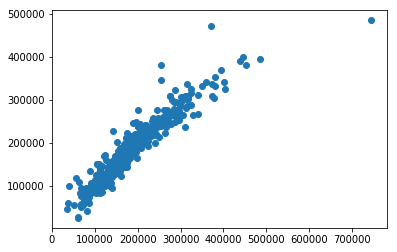

In [59]:
plt.scatter(y_test, y_test_pred)